In [20]:
def ev_to_au(x):
    return x / 27.212

def A_to_au(x):
    return x / 0.5292

def au_to_ev(x):
    return x * 27.212

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special
%matplotlib inline  


# потенциальная функция, рис.3
# (на рис.3 "a" соответствует "L")
def U(x):
    return -1 if abs(x) < L else W
    #v = lambda x: np.heaviside(1, [x])[0]
    #V0 = ev_to_au(20)
    v = lambda x: special.jv(2, [x])[0]
    V0 = ev_to_au(25)
    return V0 * v(x) if abs(x) < L else W

# Для плоской
Umin = -1
# Для хэвисайда
# Для Бесселя

# функция, ф-ла (13)
def q(e, x):
    return 2.0*(e-U(x))

# численное вычисление производной, ф-ла (19)
def deriv(Y, h, m):
    return (Y[m-2]-Y[m+2]+8.0*(Y[m+1]-Y[m-1]))/(12.0*h)

# вычисление разности производных в узле сшивки,
# формула (18)
def f_fun(e, r, n):
    F = np.array([c*q(e, X[i]) for i in np.arange(n)])
    Psi[0] = 0.0
    Fi[n-1] = 0.0
    Psi[1] = d1
    Fi[n-2] = d2
    # решение задачи Коши "вперед" методом Нумерова
    for i in np.arange(1, n-1, 1):
        p1 = 2.0*(1.0 - 5.0*F[i])*Psi[i]
        p2 = (1.0 + F[i-1])*Psi[i-1]
        Psi[i+1] = (p1 - p2)/(1.0 + F[i+1])
        
    # решение задачи Коши "назад" методом Нумерова
    for i in np.arange(n-2, 0, -1):
        f1 = 2.0*(1.0 - 5.0*F[i])*Fi[i]
        f2 = (1.0 + F[i+1])*Fi[i+1]
        Fi[i-1] = (f1 - f2)/(1.0 + F[i-1])
    
    # поиск максимального по величине элемента Psi
    p1 = np.abs(Psi).max()
    p2 = np.abs(Psi).min()
    big = p1 if p1 > p2 else p2
    # масштабирование Psi
    Psi[:] = Psi[:]/big
    # математическая нормировка Fi для
    # достижения равенства F[r]=Psi[r]
    coef = Psi[r]/Fi[r]
    Fi[:] = coef*Fi[:]
    # вычисление f(E) для узла сшивки, формула (18)
    f = deriv(Psi, h, r) - deriv(Fi, h, r)
    return f

# Вычисление собственной функций


In [30]:
#f = f_fun(x, r, n)

def signf(x):
    return -1 if x < 0 else 1

def eigen_func(start, step, func):
    EPS = 1e-5
    prev_x = x = start
    f = func(x)
    prev_sign = sign = signf(f)
    while sign == prev_sign:
        prev_x = x
        x += step
        f = func(x)
        sign = signf(f)
    
    left = prev_x
    right = x
    val = f
    while abs(val) > EPS:
        x = left + (right - left) / 2
        val = func(x)
        l_val = func(left)
        r_val = func(right)
        if signf(val) != signf(l_val):
            right = x
        else:
            left = x

    return x

Energy = 1


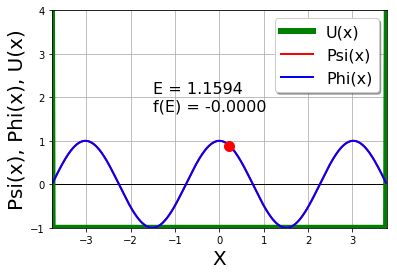

In [31]:
# задание отрезка [A, B] (края ямы)
L = A_to_au(2.0)
A = -L
B = +L
# кол-во узлов сетки на [A, B]
n = 501

# шаг сетки
h = (B-A)/(n-1)
# константа для использование в методе Нумерова
c = h**2/12.0
# минимальное значение потенциальной функции
U0 = -1.0
# максимальное значение потенциальной функции на графике
W = 4.0
Psi = np.zeros(n)
Fi = np.zeros(n)
F = np.zeros(n)
Psi2 = np.zeros(n)
X = np.linspace(A, B, n)
# номер узла сшивки
r = (n-1)//2+15
d1 = 1.e-9
d2 = d1
# ввод пристрелочного значения энергии
e = float(input("Energy = "))
func = lambda e: f_fun(e, r, n)
e = eigen_func(e, 1, func)

# построение графика
Upot = np.array([U(X[i]) for i in np.arange(n)])
plt.axis([A, B, U0, W])
Zero = np.zeros(n, dtype=float)
plt.plot(X, Zero, 'k-', linewidth=1.0)
plt.plot(X, Upot, 'g-', linewidth=6.0, label="U(x)")

plt.plot(X[1:n-1], Psi[1:n-1], 'r-',
    linewidth=2.0, label="Psi(x)")
plt.plot(X[1:n-1], Fi[1:n-1], 'b-',
    linewidth=2.0, label="Phi(x)")

plt.xlabel("X", fontsize=20, color="k")
plt.ylabel("Psi(x), Phi(x), U(x)",
    fontsize=20, color="k")
plt.grid(True)
plt.legend(fontsize=16, shadow=True,
    fancybox=True)
plt.plot([X[r]], [Psi[r]], color='red',
    marker='o', markersize=10)
string1 = "E = {:.4f}".format(e)
plt.text(-1.5, 2.1, string1,
    fontsize=16, color='black')
plt.text(-1.5, 1.7, string2,
    fontsize=16, color="black")
# сохранение графика в файл
#plt.savefig('Schrodinger-1M.pdf', dpi=300)
# вывод графика в окно
plt.show()

Квантово-механическая нормировка

\begin{equation}
C = \int_{A}^{B} \varphi(x)^2 dx \\
\varphi'(x) = \frac{\varphi(x)}{\sqrt{C}}\\
\int_{A}^{B} \varphi'(x)^2 dx == 1 
\end{equation}

In [ ]:
def T(x):
    return 

def H(x):
    return -np.hbar**2/2/m + U(x)
E = integrate(lambda x: H(x) * phi(x) ** 2)

In [35]:
# Поиск энергетического уровня
def Ek(k):
    return Umin + np.pi**2 * (k**2 / (8*L**2))

Ea = Ek(0)
Ev = au_to_ev(Ea)
print(f'Энергия основного состояни:', Ev)

n = 2
Ea = Ek(n)
Ev = au_to_ev(Ea)
print(f'Энергия n-го возб.состония:', Ev)

Энергия основного состояни: -27.212
Энергия n-го возб.состония: 6.359459370305451


n= 1001
r= 750
rr= 250
X[r]= 2.8344671201814053
XX[rr]= 2.834467120181406
e1= -0.11  e2= 3.0
ne= 101
---------
e = 0.193225
new_C = 0.9999999999999998


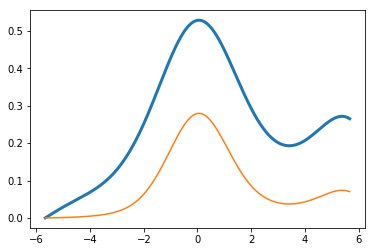

<P_x> = -3.735233272514183e-30j
<P2_x> = 1.4431050865878392e-25j
---------
e = 0.473125
new_C = 0.9999999999999998


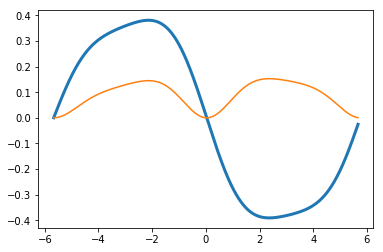

<P_x> = -5.010244350680861e-32j
<P2_x> = 3.9170430614585044e-25j
---------
e = 0.6130749999999999
new_C = 1.0


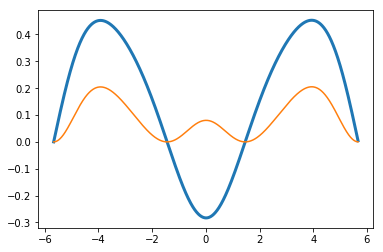

<P_x> = -9.570425021251843e-33j
<P2_x> = 7.742630766598203e-25j
---------
e = 1.188425
new_C = 0.9999999999999999


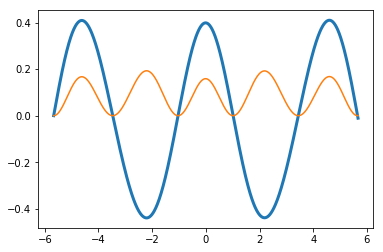

<P_x> = 5.5120431934458894e-34j
<P2_x> = 2.2898876481609093e-24j
---------
e = 1.608275
new_C = 0.9999999999999996


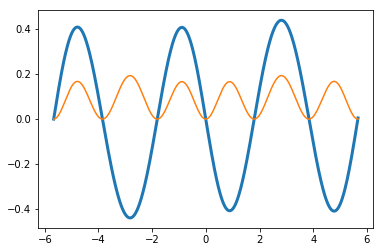

<P_x> = -5.311431468468847e-33j
<P2_x> = 3.287757407018155e-24j
---------
e = 2.105875
new_C = 1.0


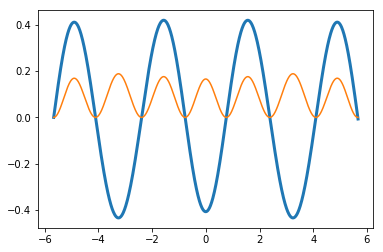

<P_x> = -4.3006550821552516e-33j
<P2_x> = 4.486332620636615e-24j


In [116]:
"""
Вычисление собственных значений и собственных функций
оператора Гамильтона методом пристрелки.
Одномерная потенциальная яма с бесконечными стенками.
Атомные единицы Хартри.
Версия 2.
"""
import numpy as np
from scipy.integrate import odeint, simps
from scipy.misc import derivative
from scipy.optimize import minimize, fmin
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.constants import hbar
global r, n, Psi, Fi, X, XX


# потенциальная функция, рис.3
# (на рис.3 "a" соответствует "L")
def U(x):
    #v = lambda x: np.heaviside(1, [x])[0]
    #V0 = ev_to_au(20)
    v = lambda x: special.jv(2, [x])[0]
    V0 = ev_to_au(25)
    return V0 * v(x) if abs(x) < L else W
    #return float(U0 if abs(x) < L else W)


# функция, ф-ла (13)
def q(e, x):
    return 2.0*(e-U(x))

# вычисление правых частей системы ОДУ 1-го порядка
# (интегрирование "вперед")
def system1(cond1, X):
    global eee
    Y0, Y1 = cond1[0], cond1[1]
    dY0dX = Y1
    dY1dX = - q(eee, X)*Y0
    return [dY0dX, dY1dX]

# вычисление правых частей системы ОДУ 1-го порядка
# (интегрирование "назад")
def system2(cond2, XX):
    global eee
    Z0, Z1 = cond2[0], cond2[1]
    dZ0dX = Z1
    dZ1dX = - q(eee, XX)*Z0
    return [dZ0dX, dZ1dX]

# вычисление разности производных в узле сшивки,
# формула (18)
def f_fun(e):
    global r, n, Psi, Fi, X, XX, eee
    eee = e
    
    """
    Решение задачи Коши ("вперед")
    dPsi1(x)/dx = - q(e, x)*Psi(x);
    dPsi(x)/dx = Psi1(x);
    Psi(A) = 0.0
    Psi1(A)= 1.0
    """
    cond1 = [0.0, 1.0]
    sol1 = odeint(system1, cond1, X)
    Psi, Psi1 = sol1[:, 0], sol1[:, 1]
    """
    Решение задачи Коши ("назад")
    dPsi1(x)/dx = - q(e, x)*Psi(x);
    dPsi(x)/dx = Psi1(x);
    Psi(B) = 0.0
    Psi1(B)= 1.0
    """
    cond2 = [0.0, 1.0]
    sol2 = odeint(system2, cond2, XX)
    Fi, Fi1 = sol2[:, 0], sol2[:, 1]
    # поиск максимального по величине элемента Psi
    p1 = np.abs(Psi).max()
    p2 = np.abs(Psi).min()
    big = p1 if p1 > p2 else p2
    # масштабирование Psi
    Psi[:] = Psi[:]/big
    # математическая нормировка Fi для
    # достижения равенства F[rr]=Psi[r]
    coef = Psi[r]/Fi[rr]
    Fi[:] = coef * Fi[:]
    # вычисление f(E) для узла сшивки, формула (18)
    curve1 = interp1d(X, Psi, kind='cubic')
    curve2 = interp1d(XX, Fi, kind='cubic')
    der1 = derivative(curve1, X[r], dx=1.e-6)
    der2 = derivative(curve2, XX[rr], dx=1.e-6)
    f = der1-der2
    return f

# функция для решения уравнения f(E) = 0 методом бисекций
def m_bis(x1, x2, tol):
    global r, n
    if f_fun(e=x2)*f_fun(e=x1) > 0.0:
        print("ERROR: no root!!!")
        print("x1=", x1)
        print("x2=", x2)
        print("f_fun(e=x1, r=r, n=n)=", f_fun(e=x1))
        print("f_fun(e=x2, r=r, n=n)=", f_fun(e=x2))
        exit()
        
    while abs(x2-x1) > tol:
        xr = (x1+x2)/2.0
        if f_fun(e=x2)*f_fun(e=xr) < 0.0:
            x1 = xr
        else:
            x2 = xr
        if f_fun(e=x1)*f_fun(e=xr) < 0.0:
            x2 = xr
        else:
            x1 = xr
        return (x1+x2)/2.0

# функция для вывода графика f(E)
def plotting_f():
    plt.axis([U0, e2, fmin, fmax])
    ZeroE = np.zeros(ne, dtype=float)
    plt.plot(ee, ZeroE, 'k-', linewidth=1.0)
    plt.plot(ee, af, 'bo', markersize=2)
    for i in range(nroots):
        plt.plot([energy[i]], [0.0], color='red',
            marker='*', markersize=10)
    plt.xlabel("E", fontsize=18, color="k")
    plt.ylabel("f(E)", fontsize=18, color="k")
    plt.grid(True)
    # save to file
    plt.show()

# функция для вывода графика волновых ф-ий и потенциала
def plotting_wf(e):
    global r, n, Psi, Fi, X, XX
    ff = f_fun(e)
    plt.axis([A, B, U0, W])
    Upot = np.array([U(X[i]) for i in np.arange(n)])
    plt.plot(X, Upot, 'g-', linewidth=6.0, label="U(x)")
    Zero = np.zeros(n, dtype=float)
    plt.plot(X, Zero, 'k-', linewidth=1.0)
    plt.plot(X, Psi, 'r-', linewidth=2.0, label="Psi(x)")
    plt.plot(XX, Fi, 'b-', linewidth=2.0, label="Fi(x)")
    plt.xlabel("X", fontsize=18, color="k")
    plt.ylabel("Psi(x), Fi(x), U(x)", fontsize=18,
        color="k")
    plt.grid(True)
    plt.legend(fontsize=16, shadow=True, fancybox=True,
        loc='upper right')
    plt.plot([X[r]], [Psi[r]], color='red', marker='o',
        markersize=7)
    string1 = "E = " + format(e, "10.7f")
    string2 = "f(E) = " + format(ff, "10.3e")
    plt.text(-1.5, 2.7, string1, fontsize=14,
        color='black')
    plt.text(-1.5, 2.3, string2, fontsize=14,
        color='black')
    
    # save to file
    plt.show()

def deriv(Y, h, m):
    return (Y[m-2]-Y[m+2]+8.0*(Y[m+1]-Y[m-1]))/(12.0*h)
    
# задание отрезка [A, B] (края ямы)
L = A_to_au(3.0)
A = -L
B = +L
# кол-во узлов сетки на [A, B]
n = 1001 # нечетное целое число
print("n=", n)
# минимальное значение потенциальной функции
U0 = -0.16
# максимальное значение потенциальной функции на графике
W = 4.0
# x-координаты узлов сетки
X = np.linspace(A, B, n) # для интегрирования "вперед"
XX = np.linspace(B, A, n) # для интегрирования "назад"
# номер узла сшивки
r = (n-1)*3//4 # для Psi
rr = n-r-1 # для Fi
print("r=", r)
print("r=", r, file=LST)
print("rr=", rr)
print("rr=", rr, file=LST)
print("X[r]=", X[r])
print("X[r]=", X[r], file=LST)
print("XX[rr]=", XX[rr])
print("XX[rr]=", XX[rr], file=LST)
# график f(E)
e1 = U0+0.05
e2 = 3.0
print("e1=", e1, " e2=", e2)
print("e1=", e1, " e2=", e2, file=LST)
ne = 101
print("ne=", ne)
print("ne=", ne, file=LST)
ee = np.linspace(e1, e2, ne)
af = np.zeros(ne, dtype=float)
porog = 5.0
tol = 1.0e-7
energy = []
ngr = 0

levels = []

# цикл поиска простых корней f(E) на отрезке [e1, e2]
for i in np.arange(ne):
    e = ee[i]
    af[i] = f_fun(e)
    stroka = "i = {:3d} e = {:8.5f} f[e] = {:12.5e}"
    #print(stroka.format(i, e, af[i]))
    #print(stroka.format(i, e, af[i]), file=LST)
    if i > 0:
        Log1 = af[i]*af[i-1] < 0.0
        Log2 = np.abs(af[i]-af[i-1]) < porog
        if Log1 and Log2:
            energy1 = ee[i-1]
            energy2 = ee[i]
            eval = m_bis(energy1, energy2, tol)
            #print("eval = {:12.5e}".format(eval))
            #dummy = plotting_wf(eval)
            energy.append(eval)
            ngr += 1
            levels.append((eval, Psi))

    # вывод значений корней уравнения f(E) = 0
    nroots = len(energy)
    #print("nroots =", nroots)
    #print("nroots =", nroots, file=LST)
    for i in np.arange(nroots):
        stroka = "i = {:1d} energy[i] = {:12.5e}"
        #print(stroka.format(i, energy[i]))
        #print(stroka.format(i, energy[i]), file=LST)
    fmax = +10.0
    fmin = -10.0
    # вывод графика f(E)
    #dummy = plotting_f()
  
for e, f in levels:
    print('---------')
    print(f'e = {e}')
    ff = f_fun(e)
    C = simps(Psi ** 2, X)
    Psi_norm = Psi / np.sqrt(C)
    new_C = simps(Psi_norm ** 2, X)
    print(f'new_C = {new_C}')
    plt.plot(X, Psi_norm, linewidth=3.0, label="Phi(x)")
    plt.plot(X, Psi_norm ** 2, label="Phi^2(x)")
    plt.show()

    Psi_norm_deriv = np.zeros(len(Psi))
    for i in range(1, len(Psi)-2):
        Psi_norm_deriv[i] = deriv(Psi_norm, 1.e-6, i)
        
    p_avg = (-1j * hbar) * simps(Psi_norm * Psi_norm_deriv)
    print(f'<P_x> = {p_avg}')
    
    Psi_norm_deriv2 = np.zeros(len(Psi))
    for i in range(1, len(Psi)-2):
        Psi_norm_deriv2[i] = deriv(Psi_norm_deriv, 1.e-6, i)
        
    p2_avg = (-1j * hbar) * simps(Psi_norm * Psi_norm_deriv2)
    print(f'<P2_x> = {p2_avg}')